# Regression Project

In [90]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Read DataFrame

In [91]:
missing_value = {''}
df = pd.read_csv('housePrice.csv', na_values= missing_value)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


## Data Exploration
Let's first have a descriptive exploration on our data.


In [92]:
# summarize the data
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


## Time To Clean The Dataset

In [93]:
# drop the rows which contain at least one Nan value
df.dropna(axis= 0, inplace= True, how= "any")
  
# convert to a appropriate data type
df['Area'] = df['Area'].str.replace(',', '')
df = df.astype({'Area': 'float'})

# drop the rows which have an non-regular Area!
index_names = df[(df['Area'] >= 10000)].index
df.drop(index_names, inplace = True)
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75.0,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105.0,2,True,True,True,Dorous,5.600000e+09,186666.67


### Let's plot Price with respect to Engine Area


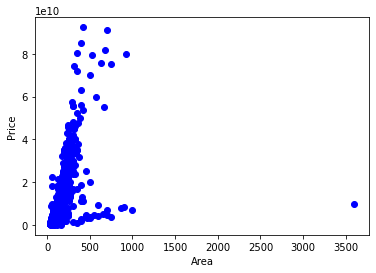

In [94]:
plt.scatter(cdf.Area, cdf.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

##### Let's change some features' value from string into int to explore more.


In [95]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Room'])
df.drop("Room", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Room'
df["Room"] = label

# Just like the last part but for other columns
label = le.fit_transform(df['Parking'])
df.drop("Parking", axis=1, inplace=True)
df["Parking"] = label

label = le.fit_transform(df['Warehouse'])
df.drop("Warehouse", axis=1, inplace=True)
df["Warehouse"] = label

label = le.fit_transform(df['Elevator'])
df.drop("Elevator", axis=1, inplace=True)
df["Elevator"] = label

label = le.fit_transform(df['Address'])
df.drop("Address", axis=1, inplace=True)
df["Address"] = label

df



,Area,Price,Price(USD),Room,Parking,Warehouse,Elevator,Address
0,63.0,1.850000e+09,61666.67,1,1,1,1,156
1,60.0,1.850000e+09,61666.67,1,1,1,1,156
2,79.0,5.500000e+08,18333.33,2,1,1,1,117
3,95.0,9.025000e+08,30083.33,2,1,1,1,152
4,123.0,7.000000e+09,233333.33,2,1,1,1,150
...,...,...,...,...,...,...,...,...
3474,86.0,3.500000e+09,116666.67,2,1,1,1,163
3475,83.0,6.800000e+09,226666.67,2,1,1,1,105
3476,75.0,3.650000e+08,12166.67,2,0,0,0,115
3477,105.0,5.600000e+09,186666.67,2,1,1,1,39


We can plot each of these features:


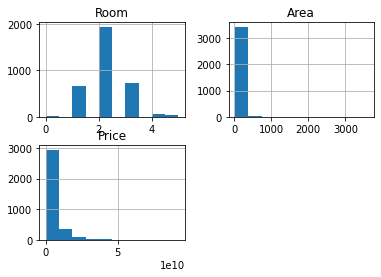

In [96]:
viz = df[['Room', 'Area', 'Price']]
viz.hist()
plt.show()

### Let's plot Price with respect to Location


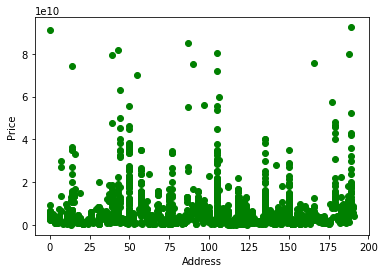

In [97]:
plt.scatter(cdf.Address, cdf.Price,  color='green')
plt.xlabel("Address")
plt.ylabel("Price")
plt.show()

### Normalizing The Data

In [98]:
# column =  ['Area', 'Parking', 'Address', 'Price']
# df[column] = df[column] /df[column].abs().max()

##### Let's select some features to explore more.


In [99]:
cdf = df[['Room','Parking','Warehouse','Elevator','Area','Address', 'Price']]
cdf

,Room,Parking,Warehouse,Elevator,Area,Address,Price
0,1,1,1,1,63.0,156,1.850000e+09
1,1,1,1,1,60.0,156,1.850000e+09
2,2,1,1,1,79.0,117,5.500000e+08
3,2,1,1,1,95.0,152,9.025000e+08
4,2,1,1,1,123.0,150,7.000000e+09
...,...,...,...,...,...,...,...
3474,2,1,1,1,86.0,163,3.500000e+09
3475,2,1,1,1,83.0,105,6.800000e+09
3476,2,0,0,0,75.0,115,3.650000e+08
3477,2,1,1,1,105.0,39,5.600000e+09


## Creating train and test dataset

In [100]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Modeling

Using sklearn package to model data.


In [101]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Room','Parking','Warehouse','Elevator','Area','Address']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 1.13748876e+09 -1.56651168e+08  1.19916687e+09  9.37347673e+08
   7.95555894e+07  2.65909823e+06]]


## Prediction

In [102]:
y_hat= regr.predict(test[['Room','Parking','Warehouse','Elevator','Area','Address']])
x = np.asanyarray(test[['Room','Parking','Warehouse','Elevator','Area','Address']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 137516543473229037568.00
Variance score: -1.02


c:\users\legion\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### As you see, variance score is 0.42. not that good and not that bad!